### Generating Overfit Tree Models

### By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

### Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings

warnings.filterwarnings("ignore")

In [27]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(21)

In [28]:
df = pd.read_csv('data/Whickham.txt')

In [29]:
df.shape

(1314, 3)

In [30]:
#df.drop_duplicates(inplace=True)
df.shape

(1314, 3)

In [31]:
df.head(5)

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [32]:
df.outcome.value_counts()

Alive    945
Dead     369
Name: outcome, dtype: int64

In [33]:
data=df.copy()
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data['outcome'] = le.fit_transform(data['outcome'])
data['outcome'].value_counts()

0    945
1    369
Name: outcome, dtype: int64

In [34]:
data.head()

,outcome,smoker,age
0,0,1,23
1,0,1,18
2,1,1,71
3,0,0,67
4,0,0,64


In [35]:
X=data[['smoker','age']]
y=data['outcome']

### Original data-sample

Accuracy: 0.860730593607306 and depth of tree 12


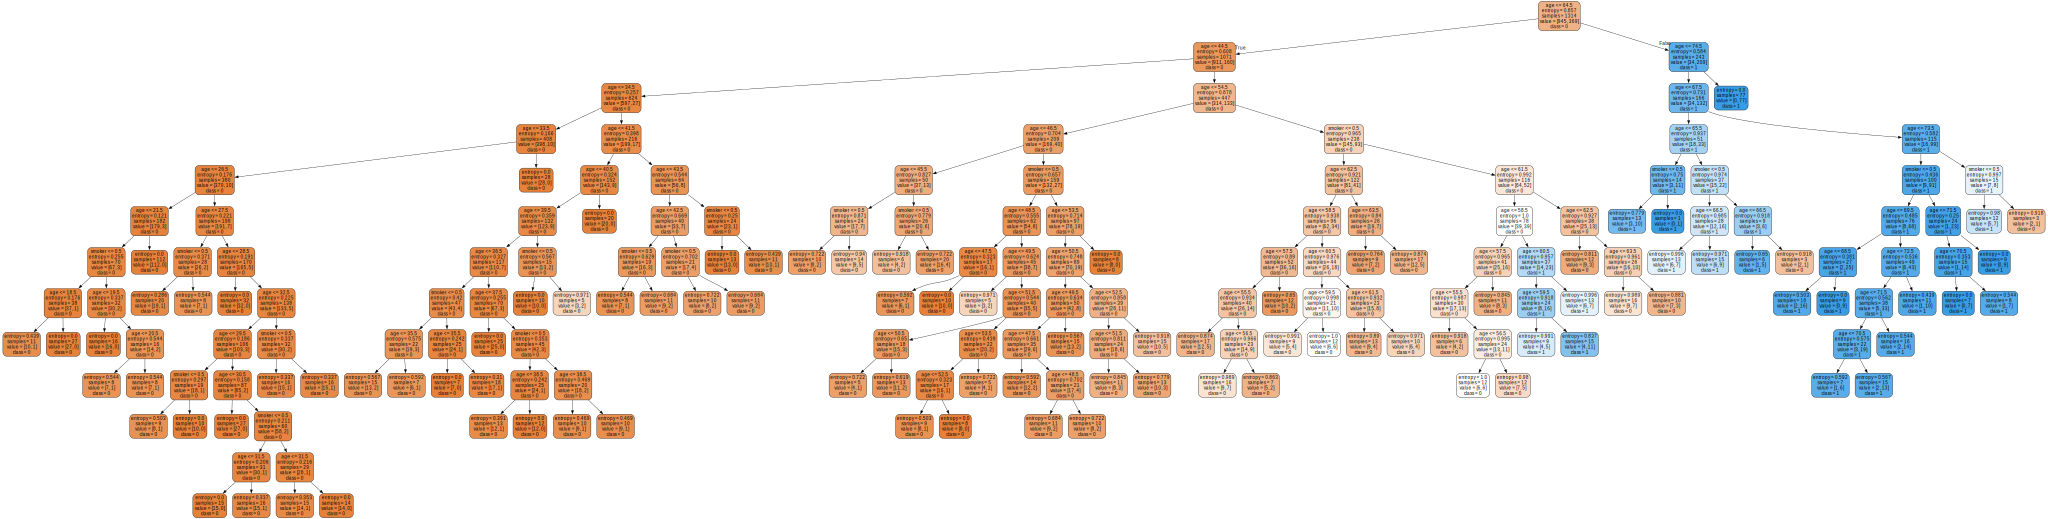

In [36]:
l_depth_tree=[]
l_accuracy_original =[]
l_mse_original = []
l_mae_original = []
l_r2_original = []
for i in range(1,14,1):
    decision_tree_model_original = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree_model_original = decision_tree_model_original.fit(data[['smoker','age']], data['outcome'])
    predictions_original = decision_tree_model_original.predict(data[['smoker','age']])
    l_accuracy_original.append(accuracy_score(data['outcome'], predictions_original))
    l_mse_original.append(mean_squared_error(data['outcome'], predictions_original))
    l_mae_original.append(mean_absolute_error(data['outcome'], predictions_original))
    l_r2_original.append( r2_score(data['outcome'], predictions_original))
    l_depth_tree.append(decision_tree_model_original.get_depth())
dot_data_e = tree.export_graphviz(decision_tree_model_original, out_file=None, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data_e)
graph.render(format="png", filename="images/iris_tree_original")
print(f"Accuracy: {accuracy_score(data['outcome'], predictions_original)} and depth of tree {decision_tree_model_original.get_depth()}")
graph

In [37]:
l_depth_tree

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12]

Best scores for:
MSE true: 0.13926940639269406 with tree depth 5
MAE true: 0.13926940639269406 with tree depth 5
Rsq true: 0.31041424699961284 with tree depth 5
Accuracy true: 0.860730593607306 with tree depth 5
Max depth of tree: 12


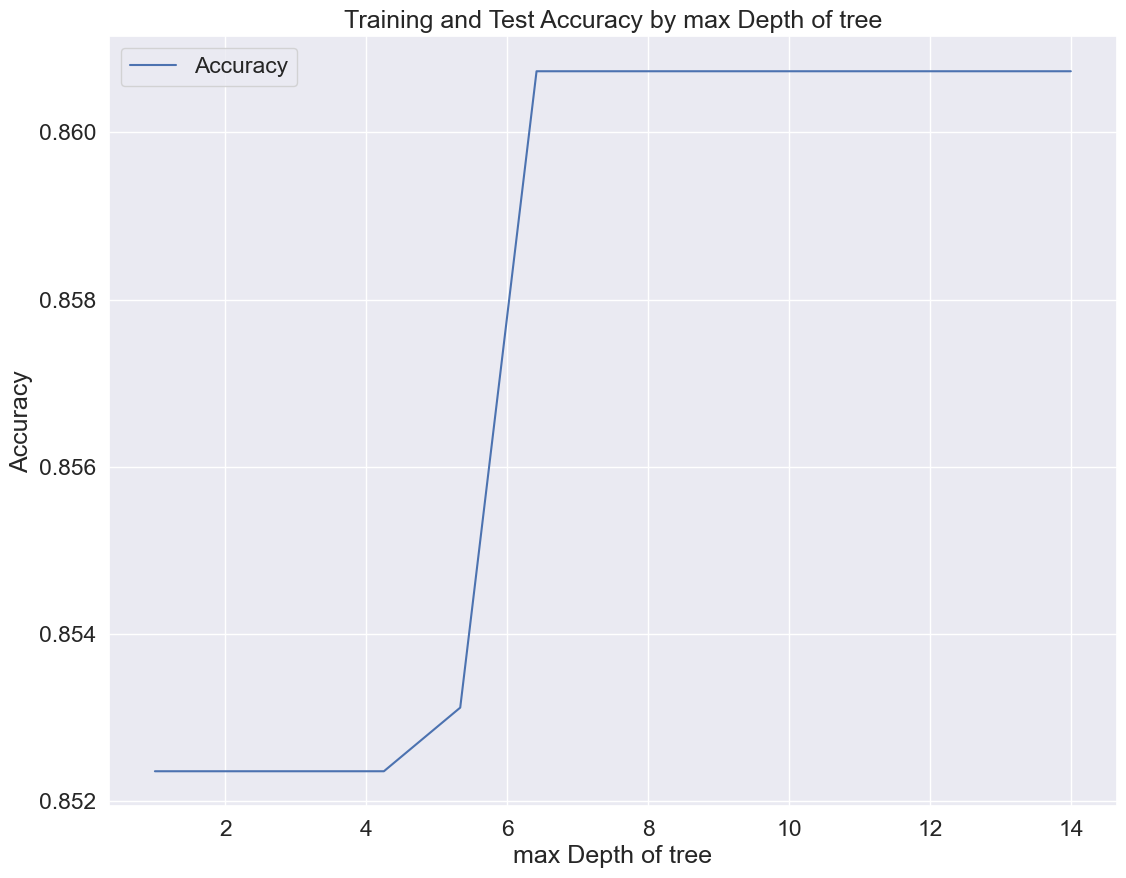

In [38]:
fig = plt.figure(figsize=(13, 10))
sns.lineplot(x=np.linspace(1,14,13).tolist(), y=l_accuracy_original, label="Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('max Depth of tree')
plt.title('Training and Test Accuracy by max Depth of tree')
print("Best scores for:")
print(f"MSE true: {min(l_mse_original)} with tree depth {l_mse_original.index(min(l_mse_original))}")
print(f"MAE true: {min(l_mae_original)} with tree depth {l_mae_original.index(min(l_mae_original))}")
print(f"Rsq true: {max(l_r2_original)} with tree depth {l_r2_original.index(max(l_r2_original))}")
print(f"Accuracy true: {max(l_accuracy_original)} with tree depth {l_accuracy_original.index(max(l_accuracy_original))}")
print(f"Max depth of tree: {max(l_depth_tree)}")

Accuracy: 0.860730593607306 and depth of tree 12


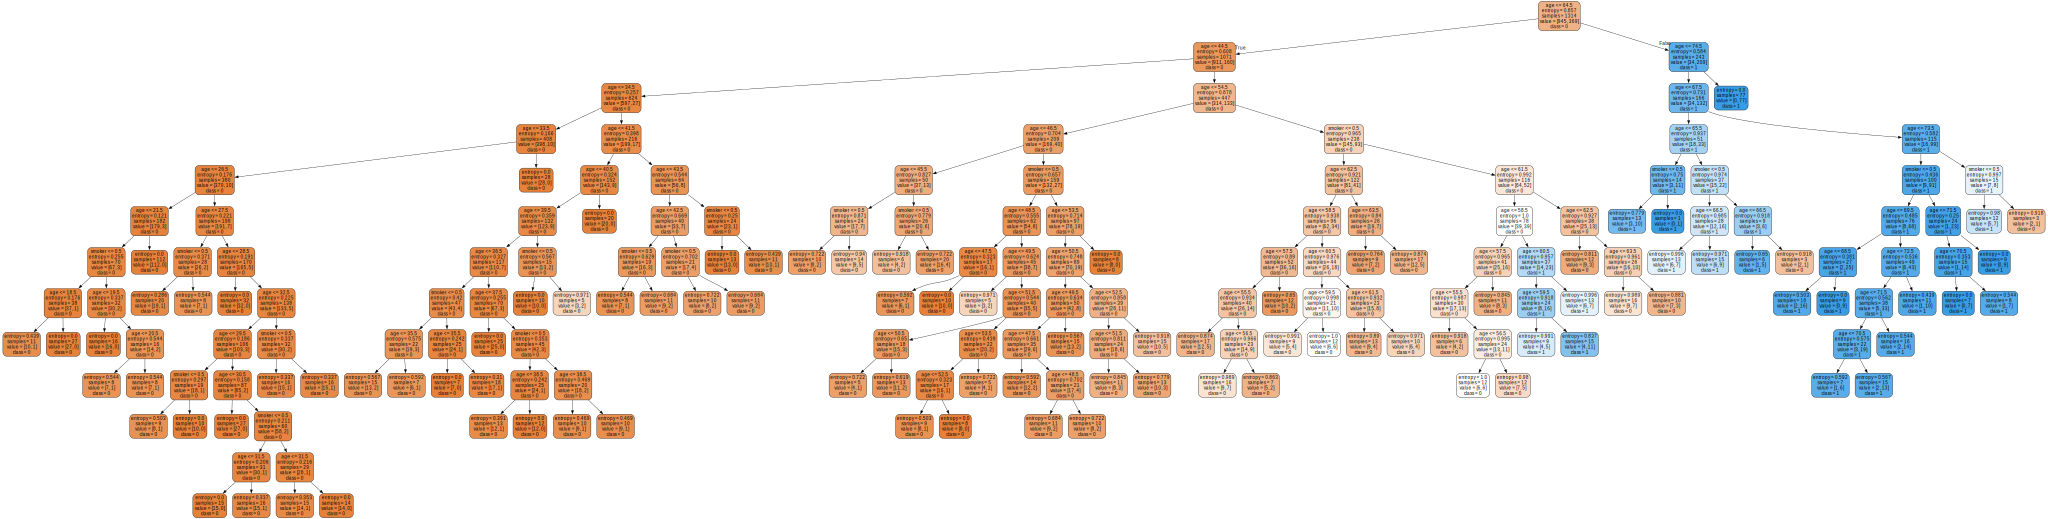

In [39]:
decision_tree_model = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_model = decision_tree_model.fit(data[['smoker','age']], data['outcome'])
predictions = decision_tree_model.predict(data[['smoker','age']])
accuracy = accuracy_score(data['outcome'], predictions_original)
dot_data_e = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data_e)
graph.render(format="png", filename="images/iris_tree_original")
print(f"Accuracy: {accuracy} and depth of tree {decision_tree_model.get_depth()}")
graph

### Train Data

In [40]:
X = data[['smoker', 'age']]
y = data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Accuracy train: 0.8602272727272727 and depth of tree 10


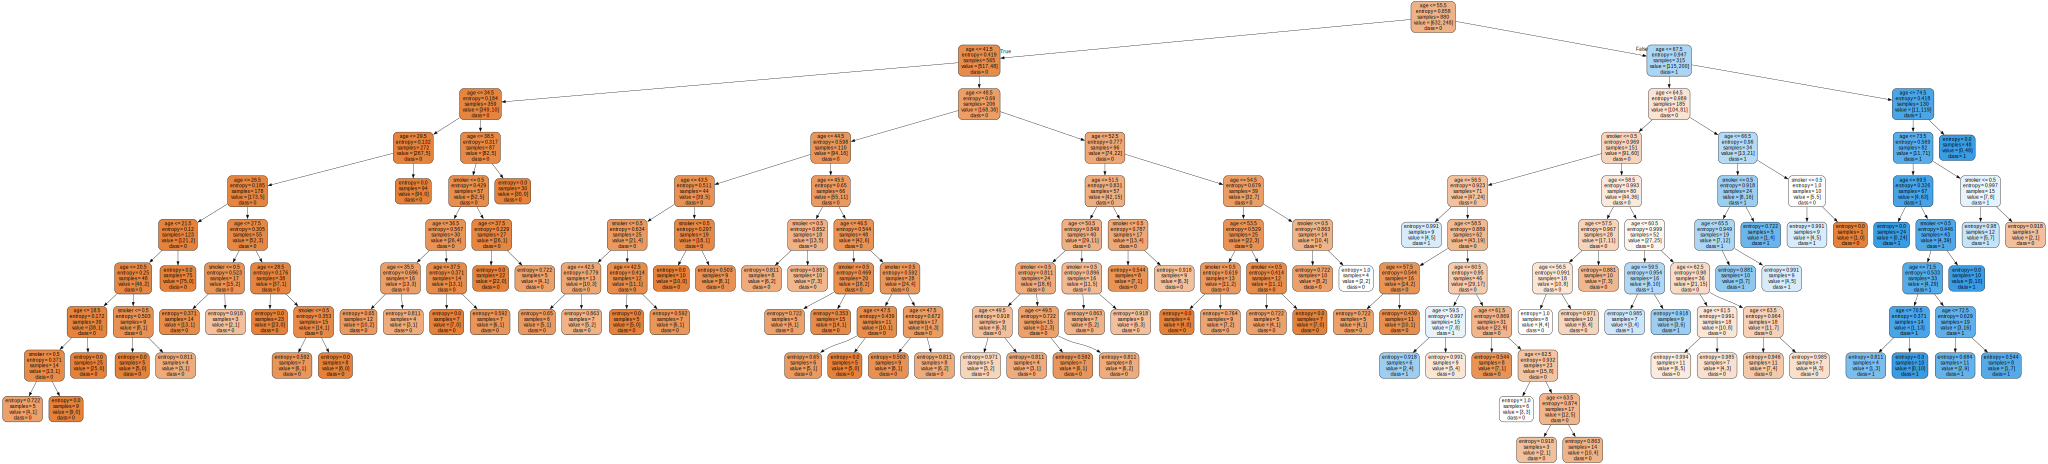

In [41]:
l_accuracy_train =[]
l_mse_train = []
l_mae_train = []
l_r2_train = []
for i in range(1,14,1):
    decision_tree_model_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree_model_train = decision_tree_model_train.fit(X_train, y_train)
    predictions_train = decision_tree_model_train.predict(X_train)
    l_accuracy_train.append(accuracy_score(y_train, predictions_train))
    l_mse_train.append(mean_squared_error(y_train, predictions_train))
    l_mae_train.append(mean_absolute_error(y_train, predictions_train))
    l_r2_train.append( r2_score(y_train, predictions_train))
dot_data = tree.export_graphviz(decision_tree_model_train, out_file=None, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="images/iris_tree_train")
print(f"Accuracy train: {accuracy_score(y_train, predictions_train)} and depth of tree {decision_tree_model_train.get_depth()}")
graph

### Test Data

Accuracy test: 0.8870967741935484 and depth of tree 11


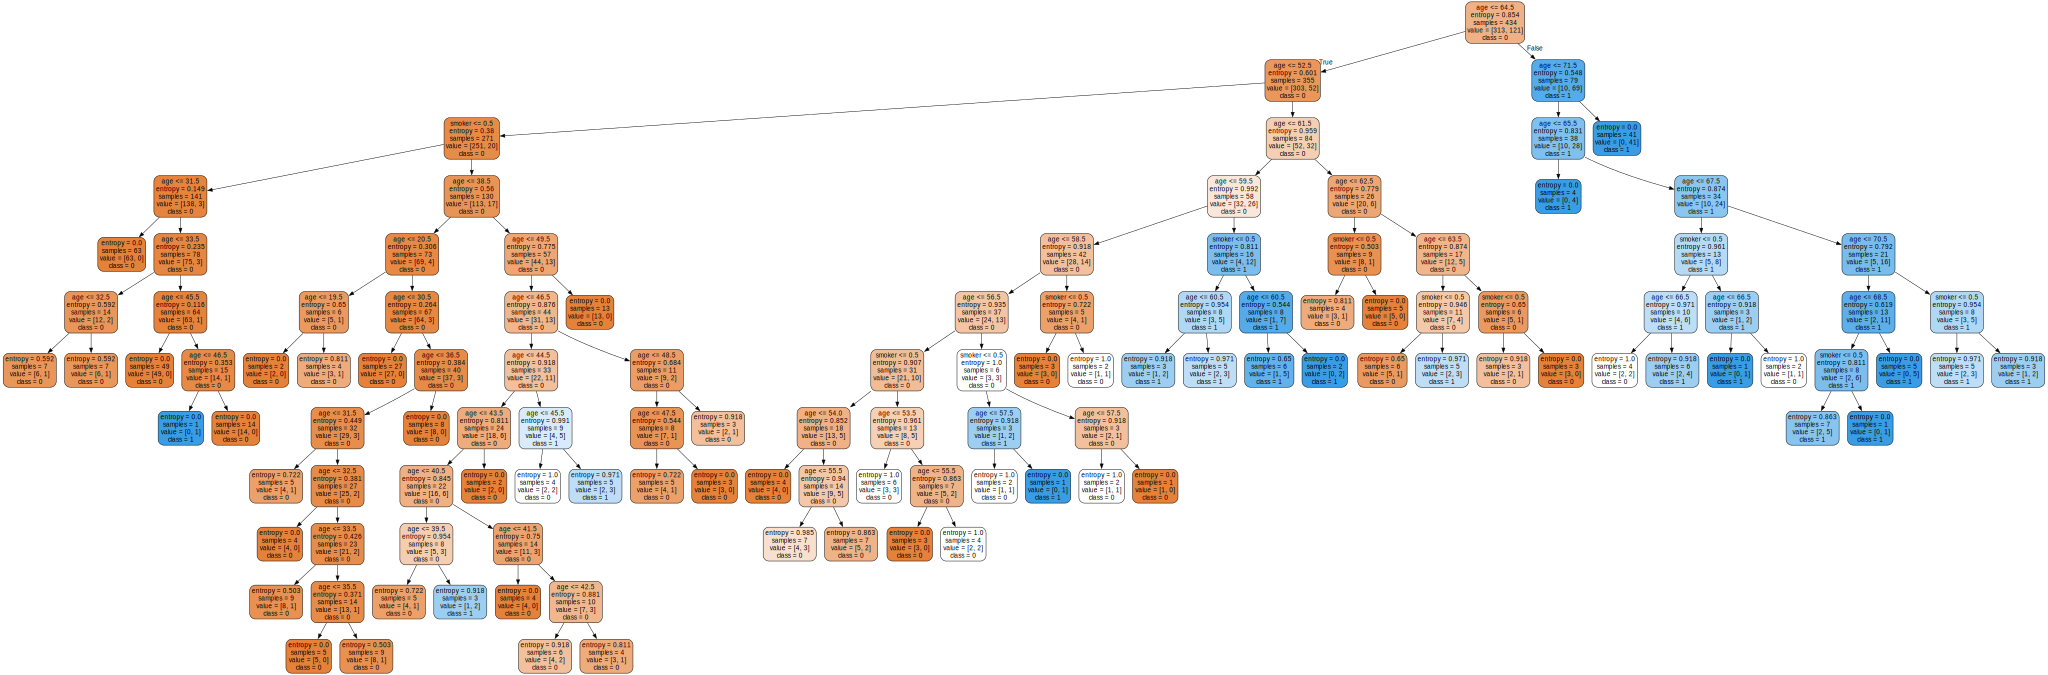

In [42]:
l_accuracy_test =[]
l_mse_test = []
l_mae_test = []
l_r2_test = []
for i in range(1,14,1):
    decision_tree_model_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree_model_test = decision_tree_model_test.fit(X_test, y_test)
    predictions_test = decision_tree_model_test.predict(X_test)
    l_accuracy_test.append(accuracy_score(y_test, predictions_test))
    l_mse_test.append(mean_squared_error(y_test, predictions_test))
    l_mae_test.append(mean_absolute_error(y_test, predictions_test))
    l_r2_test.append( r2_score(y_test, predictions_test))
dot_data = tree.export_graphviz(decision_tree_model_test, out_file=None, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="images/iris_tree_test")
print(f"Accuracy test: {accuracy_score(y_test, predictions_test)} and depth of tree {decision_tree_model_test.get_depth()}")
graph

Best scores for:
MSE train: 0.13977272727272727 with tree depth 7 and MSE test: 0.11290322580645161 with tree depth 9
MAE train: 0.13977272727272727 with tree depth 7 and MSE test: 0.11290322580645161 with tree depth 9
Rsq train: 0.3094120048999591 with tree depth 7 and Rsq test: 0.4384918015472765 with tree depth 9
Accuracy train: 0.8602272727272727 with tree depth 7 and Accuracy test: 0.8870967741935484 with tree depth 9
Accuracy true: 0.860730593607306 with tree depth 5


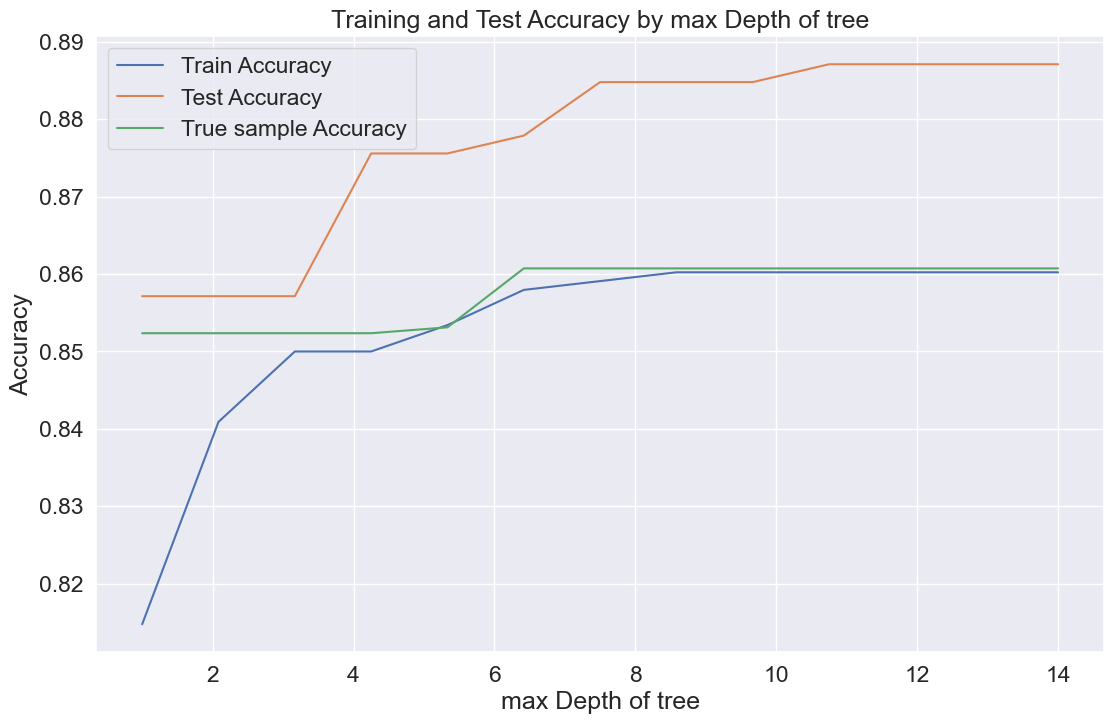

In [43]:
fig = plt.figure(figsize=(13, 8))
sns.lineplot(x=np.linspace(1,14,13).tolist(), y=l_accuracy_train, label="Train Accuracy")
sns.lineplot(x=np.linspace(1,14,13).tolist(), y=l_accuracy_test, label="Test Accuracy")
sns.lineplot(x=np.linspace(1,14,13).tolist(), y=l_accuracy_original, label="True sample Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('max Depth of tree')
plt.title('Training and Test Accuracy by max Depth of tree')
print("Best scores for:")
print(f"MSE train: {min(l_mse_train)} with tree depth {l_mse_train.index(min(l_mse_train))} and MSE test: {min(l_mse_test)} with tree depth {l_mse_test.index(min(l_mse_test))}")
print(f"MAE train: {min(l_mae_train)} with tree depth {l_mae_train.index(min(l_mae_train))} and MSE test: {min(l_mae_test)} with tree depth {l_mae_test.index(min(l_mae_test))}")
print(f"Rsq train: {max(l_r2_train)} with tree depth {l_r2_train.index(max(l_r2_train))} and Rsq test: {max(l_r2_test)} with tree depth {l_r2_test.index(max(l_r2_test))}")
print(f"Accuracy train: {max(l_accuracy_train)} with tree depth {l_accuracy_train.index(max(l_accuracy_train))} and Accuracy test: {max(l_accuracy_test)} with tree depth {l_accuracy_test.index(max(l_accuracy_test))}")
print(f"Accuracy true: {max(l_accuracy_original)} with tree depth {l_accuracy_original.index(max(l_accuracy_original))}")

In [44]:
l_mse_test

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.12442396313364056,
 0.12442396313364056,
 0.12211981566820276,
 0.1152073732718894,
 0.1152073732718894,
 0.1152073732718894,
 0.11290322580645161,
 0.11290322580645161,
 0.11290322580645161,
 0.11290322580645161]

### Split at 1100 random sample

In [45]:
train_data, test_data = np.split(data.sample(frac=1), [1100])

In [46]:
train_data = train_data.sort_values(by="outcome")
test_data = test_data.sort_values(by="outcome")

In [47]:
train_data.head()

,outcome,smoker,age
1140,0,0,60
77,0,0,55
1064,0,1,42
731,0,1,50
1311,0,1,21


Accuracy sample train: 0.8636363636363636 and depth of tree 13


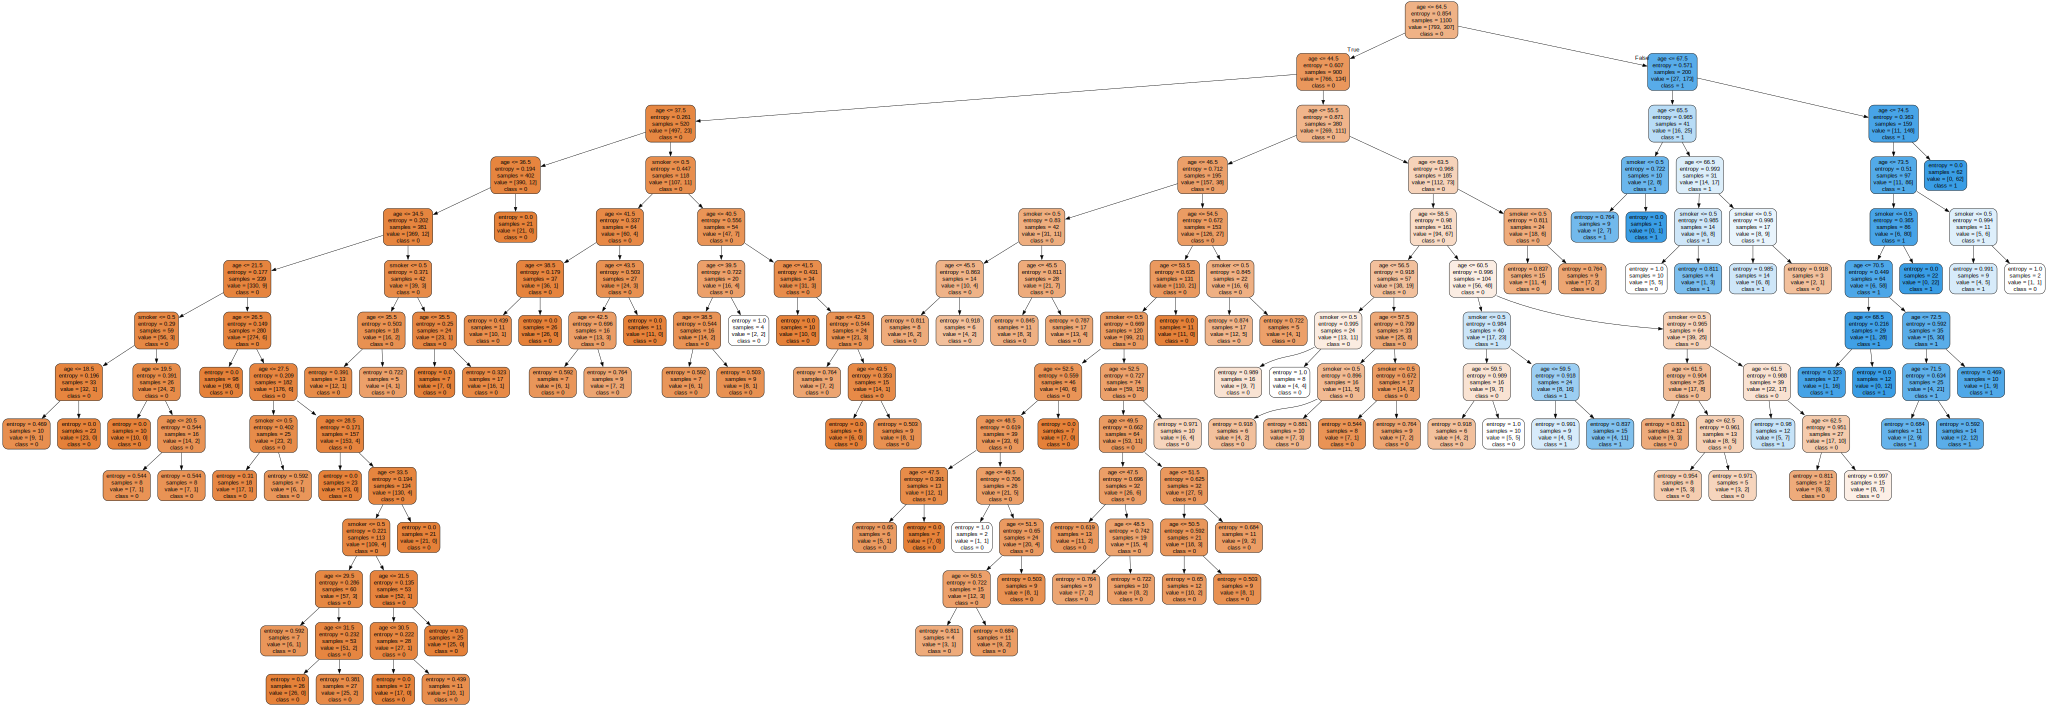

In [48]:
l_accuracy_train_e =[]
l_mse_train_e = []
l_mae_train_e = []
l_r2_train_e = []
for i in range(1,14,1):
    decision_tree_model_train_e = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree_model_train_e = decision_tree_model_train_e.fit(train_data[['smoker','age']], train_data['outcome'])
    predictions_train_e = decision_tree_model_train_e.predict(train_data[['smoker','age']])
    l_accuracy_train_e.append(accuracy_score(train_data['outcome'], predictions_train_e))
    l_mse_train_e.append(mean_squared_error(train_data['outcome'], predictions_train_e))
    l_mae_train_e.append(mean_absolute_error(train_data['outcome'], predictions_train_e))
    l_r2_train_e.append( r2_score(train_data['outcome'], predictions_train_e))
dot_data_e = tree.export_graphviz(decision_tree_model_train_e, out_file=None, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data_e)
graph.render(format="png", filename="images/iris_tree")
print(f"Accuracy sample train: {accuracy_score(train_data['outcome'], predictions_train_e)} and depth of tree {decision_tree_model_train_e.get_depth()}")
graph

Accuracy sample test: 0.897196261682243 and depth of tree 13


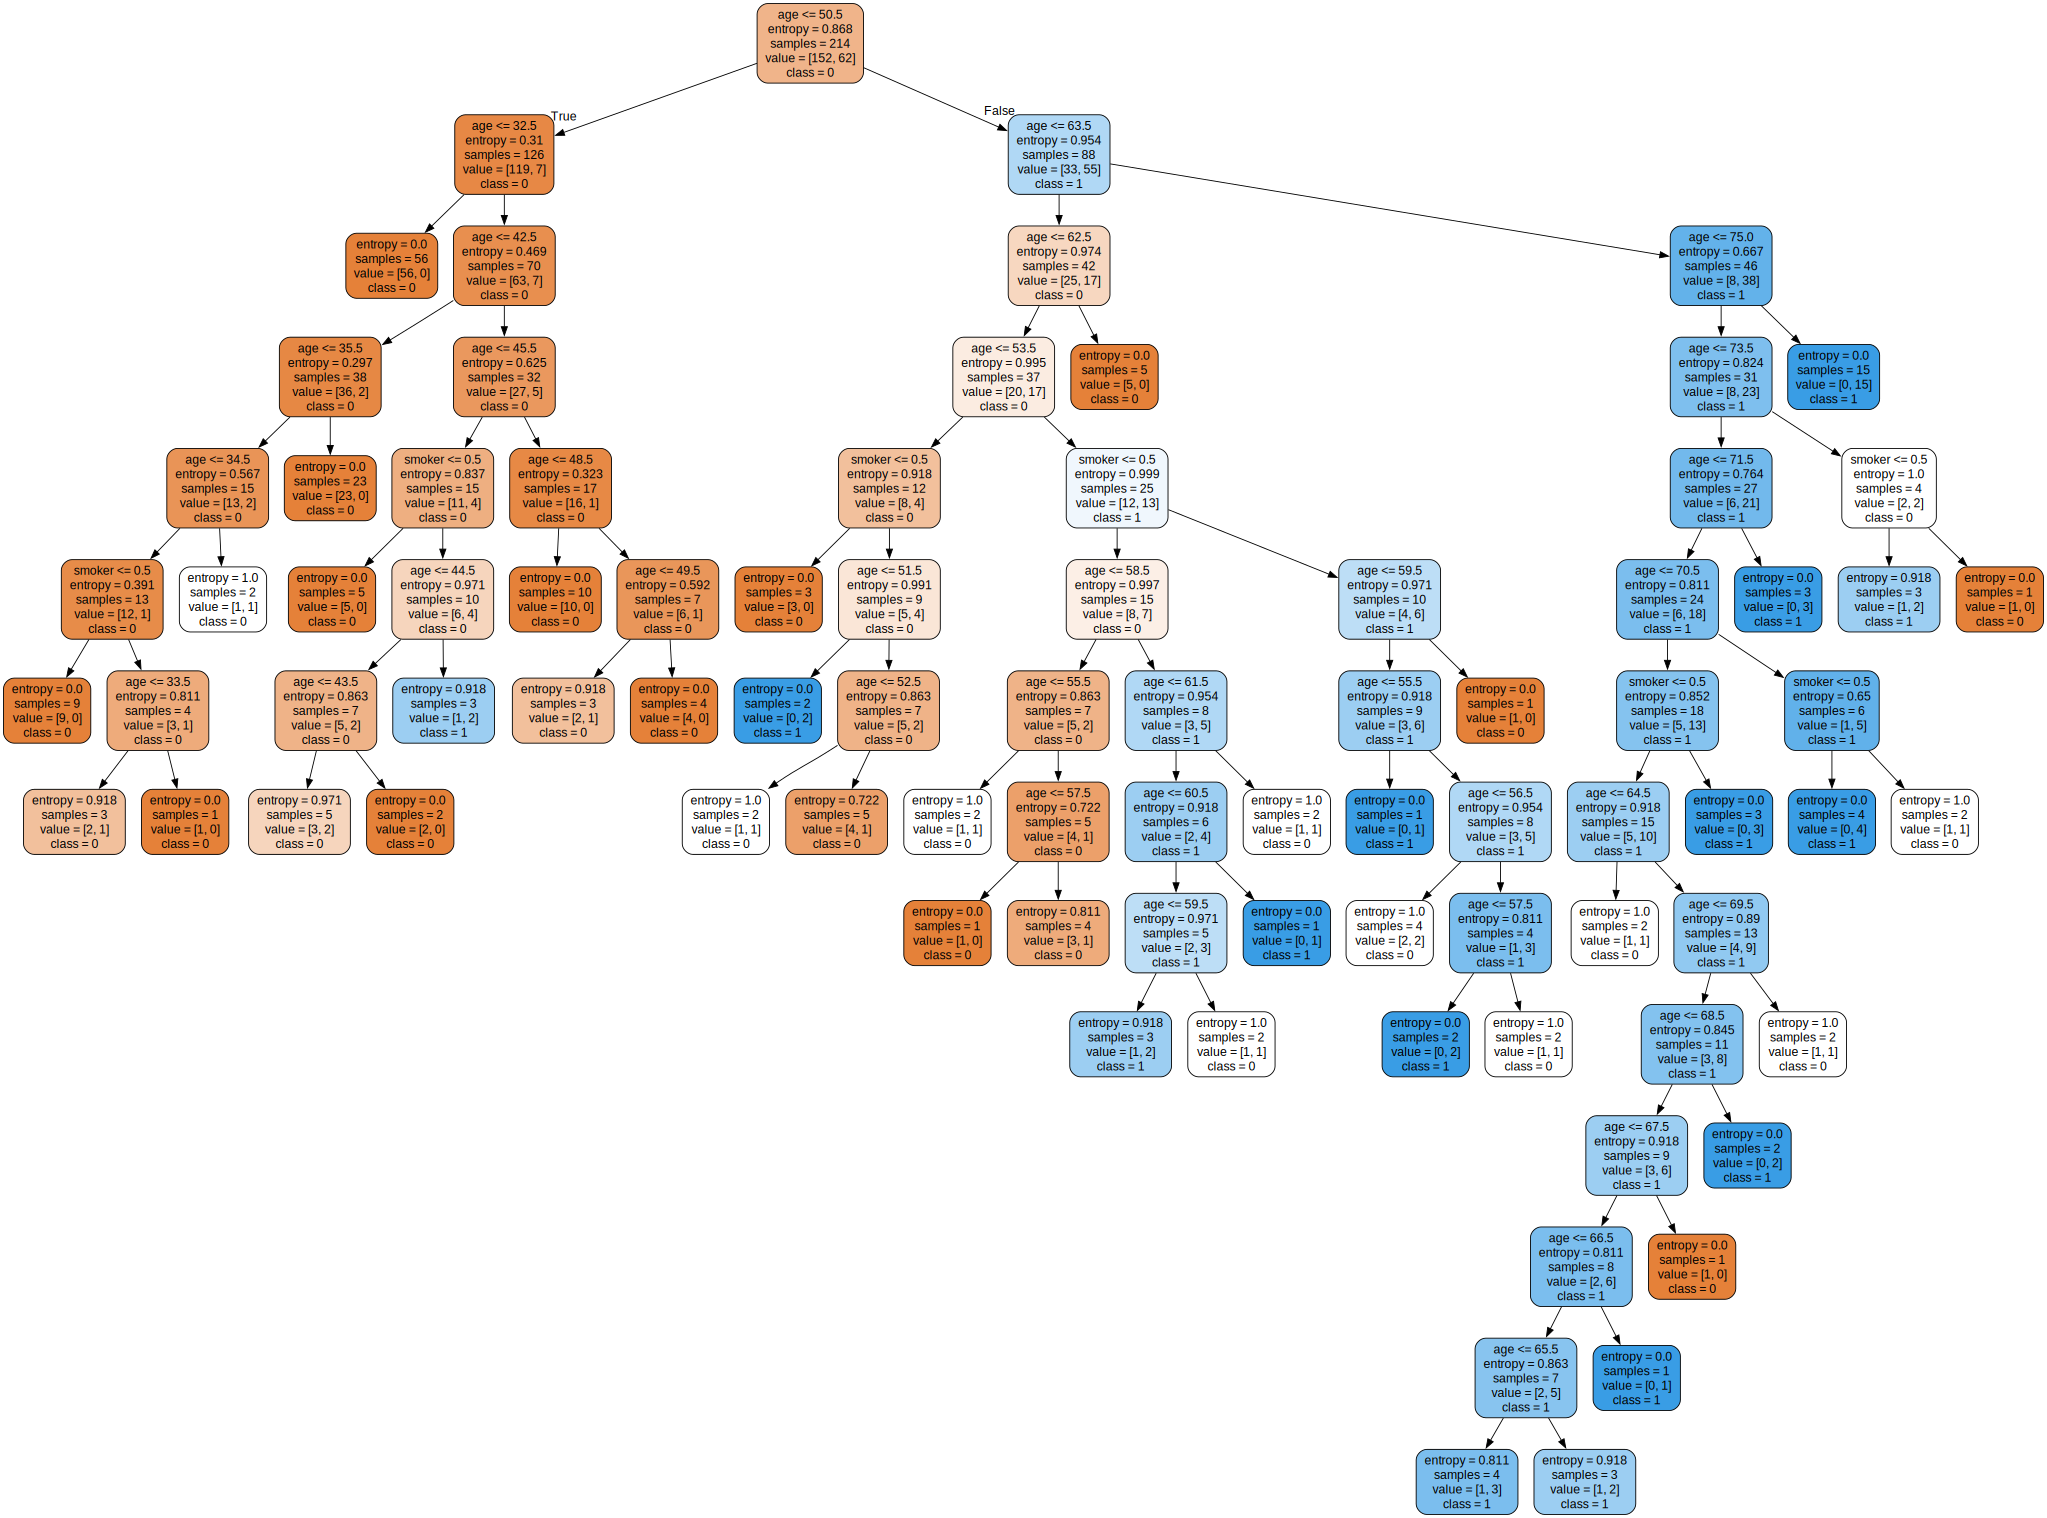

In [49]:
l_accuracy_test_e =[]
l_mse_test_e = []
l_mae_test_e = []
l_r2_test_e = []
for i in range(1,14,1):
    decision_tree_model_test_e = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree_model_test_e = decision_tree_model_test_e.fit(test_data[['smoker','age']], test_data['outcome'])
    predictions_test_e = decision_tree_model_test_e.predict(test_data[['smoker','age']])
    l_accuracy_test_e.append(accuracy_score(test_data['outcome'], predictions_test_e))
    l_mse_test_e.append(mean_squared_error(test_data['outcome'], predictions_test_e))
    l_mae_test_e.append(mean_absolute_error(test_data['outcome'], predictions_test_e))
    l_r2_test_e.append( r2_score(test_data['outcome'], predictions_test_e))
dot_data_e = tree.export_graphviz(decision_tree_model_test_e, out_file=None, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data_e)
graph.render(format="png", filename="images/iris_tree")
print(f"Accuracy sample test: {accuracy_score(test_data['outcome'], predictions_test_e)} and depth of tree {decision_tree_model_test_e.get_depth()}")
graph

Best scores for:
MSE train: 0.13636363636363635 with tree depth 7 and MSE test: 0.102803738317757 with tree depth 10
MAE train: 0.13636363636363635 with tree depth 7 and MSE test: 0.102803738317757 with tree depth 10
Rsq train: 0.322245544277904 with tree depth 7 and Rsq test: 0.5004244482173177 with tree depth 10
Accuracy train: 0.8636363636363636 with tree depth 7 and Accuracy test: 0.897196261682243 with tree depth 10
Accuracy true: 0.860730593607306 with tree depth 5


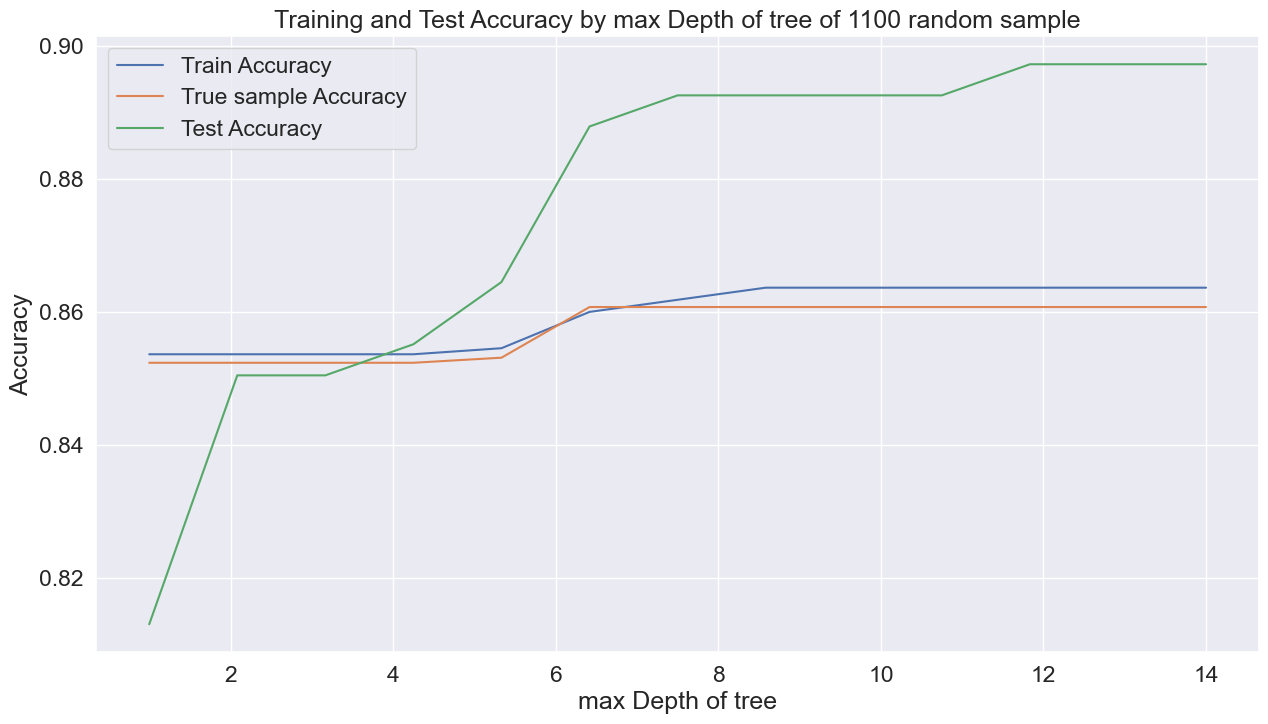

In [50]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x=np.linspace(1,14,13).tolist(), y=l_accuracy_train_e, label="Train Accuracy")
sns.lineplot(x=np.linspace(1,14,13).tolist(), y=l_accuracy_original, label="True sample Accuracy")
sns.lineplot(x=np.linspace(1,14,13).tolist(), y=l_accuracy_test_e,  label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('max Depth of tree')
plt.title('Training and Test Accuracy by max Depth of tree of 1100 random sample')
print("Best scores for:")
print(f"MSE train: {min(l_mse_train_e)} with tree depth {l_mse_train_e.index(min(l_mse_train_e))} and MSE test: {min(l_mse_test_e)} with tree depth {l_mse_test_e.index(min(l_mse_test_e))}")
print(f"MAE train: {min(l_mae_train_e)} with tree depth {l_mae_train_e.index(min(l_mae_train_e))} and MSE test: {min(l_mae_test_e)} with tree depth {l_mae_test_e.index(min(l_mae_test_e))}")
print(f"Rsq train: {max(l_r2_train_e)} with tree depth {l_r2_train_e.index(max(l_r2_train_e))} and Rsq test: {max(l_r2_test_e)} with tree depth {l_r2_test_e.index(max(l_r2_test_e))}")
print(f"Accuracy train: {max(l_accuracy_train_e)} with tree depth {l_accuracy_train_e.index(max(l_accuracy_train_e))} and Accuracy test: {max(l_accuracy_test_e)} with tree depth {l_accuracy_test_e.index(max(l_accuracy_test_e))}")
print(f"Accuracy true: {max(l_accuracy_original)} with tree depth {l_accuracy_original.index(max(l_accuracy_original))}")